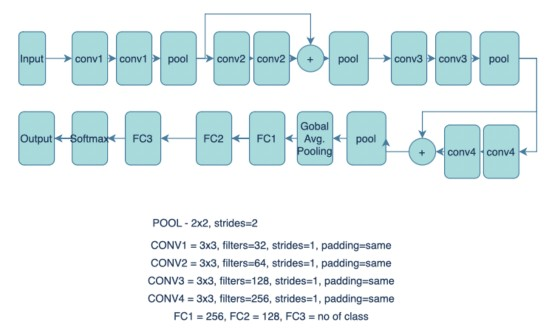

# Importing important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Add, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset and spliting of train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# First 25 images of the training dataset

In [ ]:
fig, ax = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
plt.show()

# Normalization of pixel values to the range of 0-1

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded vectors

In [5]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Custom CNN architecture with skip connections

In [6]:
def custom_cnn(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)

    # Convolutional layers with batch normalization and max pooling
    
    #Layer1
    conv1 = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv1)
    
    #Layer2
    conv2 = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv2)
    
    #Layer3
    conv3 = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv3)
    
    #Layer4
    conv4 = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv4)

    # Skip Connections
    '''skip_connection1 = Conv2D(64, kernel_size=(1, 1), strides=(1, 1), padding='same')(pool1)
    skip_connection1 = Add()([skip_connection1, conv2])

    skip_connection2 = Conv2D(256, kernel_size=(1, 1), strides=(1, 1), padding='same')(pool3)
    skip_connection2 = Add()([skip_connection2, conv4])'''

    # Global average pooling
    global_pool = GlobalAveragePooling2D()(pool4)
    
    # Flatten the output from the final_pool layer of Global_Average_Pooling
    flatten = Flatten()(global_pool)

    # Fully connected layers
    fc1 = Dense(256, activation='relu')(flatten)
    fc2 = Dense(128, activation='relu')(fc1)
    fc3 = Dense(num_classes, activation='softmax')(fc2)
    outputs=fc3

    # Model creation
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Define the input shape and number of classes

In [7]:
input_shape = x_train.shape[1:]
num_classes = 10

In [8]:
x_train.shape[1:]

(32, 32, 3)

# Create an object/instance of the custom CNN model

In [9]:
model = custom_cnn(input_shape, num_classes)

Metal device set to: Apple M1


# Compilation of the model

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model

In [13]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 26s 64ms/step - loss: 1.1742 - accuracy: 0.5795 - val_loss: 2.1057 - val_accuracy: 0.3408
Epoch 2/10
391/391 [==============================] - 25s 64ms/step - loss: 0.7391 - accuracy: 0.7406 - val_loss: 0.7860 - val_accuracy: 0.7223
Epoch 3/10
391/391 [==============================] - 25s 63ms/step - loss: 0.5650 - accuracy: 0.8033 - val_loss: 0.6689 - val_accuracy: 0.7714
Epoch 4/10
391/391 [==============================] - 25s 63ms/step - loss: 0.4398 - accuracy: 0.8468 - val_loss: 0.7000 - val_accuracy: 0.7688
Epoch 5/10
391/391 [==============================] - 25s 63ms/step - loss: 0.3458 - accuracy: 0.8803 - val_loss: 0.7186 - val_accuracy: 0.7823
Epoch 6/10
391/391 [==============================] - 25s 64ms/step - loss: 0.2722 - accuracy: 0.9053 - val_loss: 0.6916 - val_accuracy: 0.7898
Epoch 7/10
391/391 [==============================] - 25s 63ms/step - loss: 0.2123 - accuracy: 0.9263 - val_loss: 0.8195 - val_accuracy:

# Evaluate the model on the test set

In [14]:
_, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

313/313 [==============================] - 3s 11ms/step - loss: 0.8996 - accuracy: 0.7909
Test accuracy: 0.7909000515937805


In [15]:
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 79.09%


# Model Summary

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0   

# Skip Connection visulization

2023-06-30 09:33:06.210105: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 382ms/step


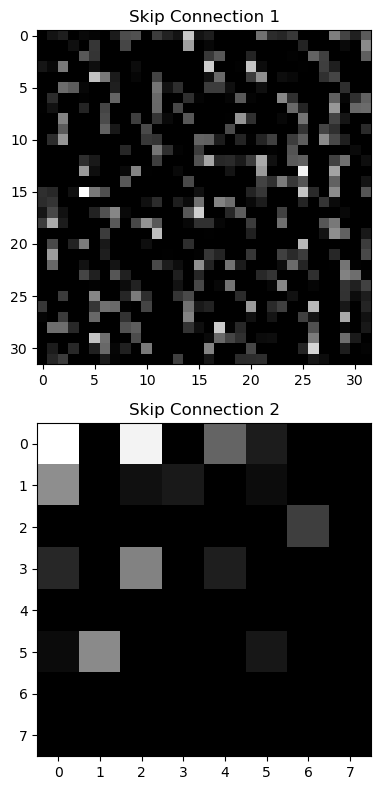

In [11]:
# Create an instance of your custom CNN model
model = custom_cnn(input_shape=(32, 32, 3), num_classes=10)

# Define the layers involved in skip connections
skip_layers = [4, 10]  # Indices of layers where skip connections occur

# Get the outputs of the skip connection layers
skip_outputs = [model.layers[i].output for i in skip_layers]

# Create a new model that only includes the skip connection layers
skip_model = Model(inputs=model.input, outputs=skip_outputs)

# Generate random input data for visualization
sample_input = np.random.randn(1, 32, 32, 3)

# Get the skip connection outputs for the sample input
skip_connections = skip_model.predict(sample_input)

# Visualize the skip connections
fig, axs = plt.subplots(len(skip_connections), 1, figsize=(8, 8))

for i, skip_output in enumerate(skip_connections):
    axs[i].imshow(skip_output[0, :, :, 0], cmap='gray')  # Visualize the first channel of the skip output
    axs[i].set_title(f"Skip Connection {i+1}")

plt.tight_layout()
plt.show()